<h1>Project 1

The objective of this project is to analyze the dataset `Salaries.csv`. For this purpose, the following tasks will be performed on the columns: BasePay, OvertimePay, OtherPay, Benefits, TotalPay, and TotalPayBenefits:

1. Calculate the standard deviation and variance without applying the methods (std() and variance()).
2. Calculate the standard deviation and variance by applying the methods (std() and variance()).
3. Calculate the coefficient of covariance and range.
4. Calculate the measures of central tendency (mean, median, mode).
5. Apply the describe() method to get a summary of the dataset.
6. Build histograms to visualize the distribution of each column.
7. Build boxplots to visualize the distribution and summary statistics of each column.
8. Calculate the Interquartile Range (IQR) for each column.
9. Write a short summary of the findings and insights from the data analysis.

                                                    Disclaimer!!
Throughout the project, the author will handle any outliers in a considered manner and avoid dropping them entirely. The intention is to retain valuable information and maintain the integrity of the dataset. Additionally, the author acknowledges that as time passes, perspectives may change, leading to the possibility of revisiting the dataset in the future with a fresh perspective and enhanced knowledge for further analysis.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('D:/Salaries.csv')

In [3]:
df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN


From the preliminary observation, it is noticeable that there some non numeric values for columns BasePay, OvertimePay, Benefits; negative values for TotalPay, TotalPayBenefits; and column Year seems to be fine at first. Let's continue analyzing data but more closely

In [4]:
df['Year'].value_counts()

2014    38123
2013    37606
2012    36766
2011    36159
Name: Year, dtype: int64

Year column seems to be ok, but why should we apply methods like std() for year. For now, it seems illogical.

For the following part, I will try to clean or replace all cells with incorrect or non numeric data 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


<h2> 0. Cleaning

<h3>Working with Row `BasePay` 

<h4>Cleaning 

In [6]:
df_new = pd.DataFrame()
df_new = df
df_new = df[pd.to_numeric(df['BasePay'], errors ='coerce' ).notna()] # isna() is the same as isnull()
df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN


In [7]:
df_new['BasePay'] = df_new['BasePay'].apply(float)
df_new['BasePay'].value_counts()

0.00        1298
54703.00     338
55026.00     297
48472.40     210
65448.00     153
            ... 
79070.51       1
50993.45       1
23296.84       1
96647.84       1
94702.00       1
Name: BasePay, Length: 109489, dtype: int64

In [8]:
df_new = df_new.drop(df_new[df_new['BasePay'] == 0.0].index)
df_new

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148613,148614,Nanette M Lloyd,Special Nurse,19.97,0.00,0.00,4.30,19.97,24.27,2014,NaN,San Francisco,PT
148616,148617,Afakasi O Afakasi,Public Service Trainee,21.48,0.00,0.86,0.22,22.34,22.56,2014,NaN,San Francisco,PT
148617,148618,Charles F Williams Iii,Pool Lifeguard,17.26,0.00,0.00,4.04,17.26,21.30,2014,NaN,San Francisco,PT
148619,148620,Ian V Cameron,IS Program Analyst-Assistant,6.04,0.00,10.05,2.30,16.09,18.39,2014,NaN,San Francisco,PT


In [9]:
df_new = df_new[df_new['BasePay'] > 0]
df_new = df_new.reset_index(drop = True)
df_new

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
146731,148614,Nanette M Lloyd,Special Nurse,19.97,0.00,0.00,4.30,19.97,24.27,2014,NaN,San Francisco,PT
146732,148617,Afakasi O Afakasi,Public Service Trainee,21.48,0.00,0.86,0.22,22.34,22.56,2014,NaN,San Francisco,PT
146733,148618,Charles F Williams Iii,Pool Lifeguard,17.26,0.00,0.00,4.04,17.26,21.30,2014,NaN,San Francisco,PT
146734,148620,Ian V Cameron,IS Program Analyst-Assistant,6.04,0.00,10.05,2.30,16.09,18.39,2014,NaN,San Francisco,PT


In [10]:
# df[df['BasePay'].notnull()]['BasePay'].value_counts()
# df = df.drop(df[df['BasePay'] == 'Not Provided'].index)
# df = df.drop(df[df['BasePay'] == '0.00'].index)
# df = df.drop(df[df['BasePay'] == 0.0].index)
# df['BasePay'] = df['BasePay'].dropna()
# df['BasePay'] = df['BasePay'].apply(float) # alternative way
# df = df.drop(df[(df['BasePay'] > 0.0) == False].index)
# df = df.reset_index(drop = True)
# (df == df_new)['BasePay'].value_counts()

Now, it seems that the row BasePay is clean, still there is room for future improvement. Let us continue working with stats

<h3>Working with Row `OvertimePay` 

<h4>Cleaning 

In [11]:
df_new['OvertimePay'].value_counts()


0.0         64699
0.00        10796
10.68          41
681.23         41
152.13         38
            ...  
27376.88        1
6779.84         1
3537.37         1
27382.38        1
7672.03         1
Name: OvertimePay, Length: 66482, dtype: int64

We can see that a lot of rows have value zero

In [12]:
df_new['OvertimePay'] = df_new['OvertimePay'].apply(float)

In [13]:
df_new[(df_new['OvertimePay'].astype(float) < 0)]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
89827,90715,Claudia M Sanchez,Senior Eligibility Worker,75033.03,-0.01,1540.0,28864.64,76573.02,105437.66,2013,NaN,San Francisco,NaN


It is strange that for OvertimePay someone got -0.01, still this value is almost not effecting to the statistics

In [14]:
df_new['OvertimePay'].value_counts()

0.00        75495
10.68          41
681.23         41
152.13         38
1314.78        27
            ...  
5612.46         1
729.51          1
15003.14        1
18466.90        1
18726.02        1
Name: OvertimePay, Length: 65928, dtype: int64

There are so many zeros, and I believe it makes sense, as not everyone tend to overwork

<h3>Working with Row `Benefits` 

<h4>Cleaning 

In [15]:
df_new['Benefits'].value_counts(dropna = False)

NaN         35707
0.0           907
0.00          522
25699.2        83
37055.22       82
            ...  
38120.69        1
38119.63        1
38118.54        1
38117.59        1
12.51           1
Name: Benefits, Length: 99093, dtype: int64

Again, bonuses are recieved not by everyone, that is why no values will be dropped

In [16]:
df_new['Benefits'] = df_new['Benefits'].astype(float)
df_new['Benefits'] = df_new['Benefits'].fillna(0)
df_new

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.00,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.00,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,0.00,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.9,0.00,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.00,326373.19,326373.19,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
146731,148614,Nanette M Lloyd,Special Nurse,19.97,0.00,0.00,4.30,19.97,24.27,2014,NaN,San Francisco,PT
146732,148617,Afakasi O Afakasi,Public Service Trainee,21.48,0.00,0.86,0.22,22.34,22.56,2014,NaN,San Francisco,PT
146733,148618,Charles F Williams Iii,Pool Lifeguard,17.26,0.00,0.00,4.04,17.26,21.30,2014,NaN,San Francisco,PT
146734,148620,Ian V Cameron,IS Program Analyst-Assistant,6.04,0.00,10.05,2.30,16.09,18.39,2014,NaN,San Francisco,PT


In [17]:
df_new

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.00,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.00,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,0.00,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.9,0.00,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.00,326373.19,326373.19,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
146731,148614,Nanette M Lloyd,Special Nurse,19.97,0.00,0.00,4.30,19.97,24.27,2014,NaN,San Francisco,PT
146732,148617,Afakasi O Afakasi,Public Service Trainee,21.48,0.00,0.86,0.22,22.34,22.56,2014,NaN,San Francisco,PT
146733,148618,Charles F Williams Iii,Pool Lifeguard,17.26,0.00,0.00,4.04,17.26,21.30,2014,NaN,San Francisco,PT
146734,148620,Ian V Cameron,IS Program Analyst-Assistant,6.04,0.00,10.05,2.30,16.09,18.39,2014,NaN,San Francisco,PT


<h3>Working with Row `TotalPay and TotalPayBenefits` 

In [18]:
df_new['TotalPay'].notna().value_counts()

True    146736
Name: TotalPay, dtype: int64

Wow! How amazing it is to see all columns of correct type! But still we have to check the dependency, it seems that `TotalPay` column is equal to the sum of 3 other columns. 2 columns among them are already cleaned, and one is remaining - `OtherPay`. The same applies to the column named `TotalPayBenefits`, but it has one additional term, a column named `Benefits`.

In [19]:
df_new['OtherPay'] = df_new['OtherPay'].astype(float)
df_new['OtherPay']

0         400184.25
1         137811.38
2          16452.60
3         198306.90
4         182234.59
            ...    
146731         0.00
146732         0.86
146733         0.00
146734        10.05
146735         0.00
Name: OtherPay, Length: 146736, dtype: float64

Zero values are ok here, as it is Other Pay. Now, it is time to check column for negative values.

In [20]:
df_new[df_new['OtherPay'] < 0]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
84083,84970,Pei Meng,IS Business Analyst-Principal,101274.51,0.00,-7058.59,34583.40,94215.92,128799.32,2013,NaN,San Francisco,NaN
92309,93201,Jose A Lemus,Custodial Supervisor,66744.00,2234.40,-9.60,26889.04,68968.80,95857.84,2013,NaN,San Francisco,NaN
95277,96169,John G Alexander,Gardener,59733.32,46.76,-46.76,25863.91,59733.32,85597.23,2013,NaN,San Francisco,NaN
105856,107185,Amelie E Bullard,Special Nurse,6932.50,0.00,-50.19,418.03,6882.31,7300.34,2013,NaN,San Francisco,NaN


After thinking for the while, the assumption about the employee taking debt of any form was made. Therefore, negative values will not be removed. <br><br>
Now, let us turn our attention to columns `TotalPay` and `TotalPayBenefits`, as it was mentioned it is just the summation of 3 columns and we are about to check it:

In [21]:
totalPay = ((round((df_new['BasePay'] + df_new['OvertimePay'] + df_new['OtherPay']), 2)) == df_new['TotalPay']).value_counts()
totalPay

True    146736
dtype: int64

In [22]:
totalPayBenefits = ((round((df_new['BasePay'] + df_new['OvertimePay'] + df_new['OtherPay'] + df_new['Benefits']), 2)) == df_new['TotalPayBenefits']).value_counts()
totalPayBenefits

True    146736
dtype: int64

Yeeey! Great! Now, all the columns are safe, or at least cleaned as tightly as an author was able to do it at the moment of cleaning, hehehe

In [23]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146736 entries, 0 to 146735
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                146736 non-null  int64  
 1   EmployeeName      146736 non-null  object 
 2   JobTitle          146736 non-null  object 
 3   BasePay           146736 non-null  float64
 4   OvertimePay       146736 non-null  float64
 5   OtherPay          146736 non-null  float64
 6   Benefits          146736 non-null  float64
 7   TotalPay          146736 non-null  float64
 8   TotalPayBenefits  146736 non-null  float64
 9   Year              146736 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            146736 non-null  object 
 12  Status            37693 non-null   object 
dtypes: float64(7), int64(2), object(4)
memory usage: 14.6+ MB


<h2> 1. Calculating standard deviation and variance without using methods std() and *variance() </h2>
*the method variance() does not exist, at least in pandas library, but var() exists

<h3> Std and Var of column BasePay

In [24]:
mean_basepay = df_new['BasePay'].sum() / df_new['BasePay'].shape[0]
mean_basepay

66917.13032105278

In [25]:
deviation_basepay = df_new['BasePay'] - mean_basepay
deviation_basepay 

0         100494.049679
1          89048.889679
2         145821.999679
3          10998.869679
4          67484.469679
              ...      
146731    -66897.160321
146732    -66895.650321
146733    -66899.870321
146734    -66911.090321
146735    -66901.630321
Name: BasePay, Length: 146736, dtype: float64

In [26]:
deviation_square_sum_basepay = (deviation_basepay ** 2).sum()
deviation_square_sum_basepay

264935072807928.8

In [27]:
variance_basepay = deviation_square_sum_basepay / (df_new['BasePay'].shape[0] - 1)
variance_basepay

1805534281.5819595

In [28]:
standard_deviation_basepay = (variance_basepay ** (1/2)) 
standard_deviation_basepay

42491.57894903365

<h3> Std and Var of column OvertimePay

In [29]:
mean_overtimepay = df_new['OvertimePay'].sum() / df_new['OvertimePay'].shape[0]
mean_overtimepay

5130.611404972195

In [30]:
deviation_overtimepay = df_new['OvertimePay'] - mean_overtimepay
deviation_overtimepay

0          -5130.611405
1         240001.268595
2         100957.568595
3          50990.098595
4           4606.388595
              ...      
146731     -5130.611405
146732     -5130.611405
146733     -5130.611405
146734     -5130.611405
146735     -5130.611405
Name: OvertimePay, Length: 146736, dtype: float64

In [31]:
deviation_square_sum_overtimepay = (deviation_overtimepay ** 2).sum()
deviation_square_sum_overtimepay

19451320903454.785

In [32]:
variance_overtimepay = deviation_square_sum_overtimepay / (df_new['OvertimePay'].shape[0] - 1)
variance_overtimepay

132560881.20390354

In [33]:
standard_deviation_overtimepay = (variance_overtimepay ** (1/2)) 
standard_deviation_overtimepay

11513.508640023836

<h3> Std and Var of column OtherPay

In [34]:
mean_otherpay = df_new['OtherPay'].sum() / df_new['OtherPay'].shape[0]
mean_otherpay

3638.4051323465264

In [35]:
deviation_otherpay = df_new['OtherPay'] - mean_otherpay
deviation_otherpay

0         396545.844868
1         134172.974868
2          12814.194868
3         194668.494868
4         178596.184868
              ...      
146731     -3638.405132
146732     -3637.545132
146733     -3638.405132
146734     -3628.355132
146735     -3638.405132
Name: OtherPay, Length: 146736, dtype: float64

In [36]:
deviation_square_sum_otherpay = (deviation_otherpay ** 2).sum()
deviation_square_sum_otherpay

9307103122274.793

In [37]:
variance_otherpay = deviation_square_sum_otherpay / (df_new['OtherPay'].shape[0] - 1)
variance_otherpay

63427969.620573096

In [38]:
standard_deviation_otherpay = (variance_otherpay ** (1/2)) 
standard_deviation_otherpay

7964.167854871788

<h3> Std and Var of column Benefits

In [39]:
mean_benefits = df_new['Benefits'].sum() / df_new['Benefits'].shape[0]
mean_benefits

19142.60112405954

In [40]:
deviation_benefits = df_new['Benefits'] - mean_benefits
deviation_benefits 

0        -19142.601124
1        -19142.601124
2        -19142.601124
3        -19142.601124
4        -19142.601124
              ...     
146731   -19138.301124
146732   -19142.381124
146733   -19138.561124
146734   -19140.301124
146735   -19142.441124
Name: Benefits, Length: 146736, dtype: float64

In [41]:
deviation_square_sum_benefits = (deviation_benefits ** 2).sum()
deviation_square_sum_benefits

43236415743759.93

In [42]:
variance_benefits = deviation_square_sum_benefits / (df_new['Benefits'].shape[0] - 1)
variance_benefits

294656460.583773

In [43]:
standard_deviation_benefits = (variance_benefits ** (1/2)) 
standard_deviation_benefits

17165.560304976152

<h3> Std and Var of column TotalPay

In [44]:
mean_totalpay = df_new['TotalPay'].sum() / df_new['TotalPay'].shape[0]
mean_totalpay

75686.14685837152

In [45]:
deviation_totalpay = df_new['TotalPay'] - mean_totalpay
deviation_totalpay

0         491909.283142
1         463223.133142
2         259593.763142
3         256657.463142
4         250687.043142
              ...      
146731    -75666.176858
146732    -75663.806858
146733    -75668.886858
146734    -75670.056858
146735    -75670.646858
Name: TotalPay, Length: 146736, dtype: float64

In [46]:
deviation_square_sum_totalpay = (deviation_totalpay ** 2).sum()
deviation_square_sum_totalpay

369409946717294.75

In [47]:
variance_totalpay = deviation_square_sum_totalpay / (df_new['TotalPay'].shape[0] - 1)
variance_totalpay

2517531241.471324

In [48]:
standard_deviation_totalpay = (variance_totalpay ** (1/2)) 
standard_deviation_totalpay

50175.00614321162

<h3> Std and Var of column TotalPayBenefits

In [49]:
mean_totalpaybenefits = df_new['TotalPayBenefits'].sum() / df_new['TotalPayBenefits'].shape[0]
mean_totalpaybenefits

94828.74798243103

In [50]:
deviation_totalpaybenefits = df_new['TotalPayBenefits'] - mean_totalpaybenefits
deviation_totalpaybenefits

0         472766.682018
1         444080.532018
2         240451.162018
3         237514.862018
4         231544.442018
              ...      
146731    -94804.477982
146732    -94806.187982
146733    -94807.447982
146734    -94810.357982
146735    -94813.087982
Name: TotalPayBenefits, Length: 146736, dtype: float64

In [51]:
deviation_square_sum_totalpaybenefits = (deviation_totalpaybenefits ** 2).sum()
deviation_square_sum_totalpaybenefits

571075712611135.8

In [52]:
variance_totalpaybenefits = deviation_square_sum_totalpaybenefits / (df_new['TotalPayBenefits'].shape[0] - 1)
variance_totalpaybenefits

3891884776.032547

In [53]:
standard_deviation_totalpaybenefits = (variance_totalpaybenefits ** (1/2)) 
standard_deviation_totalpaybenefits

62384.97235739187

<h2> 2. Calculating standard deviation with `std()` and `var()` methods

For BasePay:

In [54]:
df_new['BasePay'].var()

1805534281.5819597

In [55]:
df_new['BasePay'].std()

42491.578949033654

For OvertimePay:

In [56]:
df_new['OvertimePay'].var()

132560881.20405667

In [57]:
df_new['OvertimePay'].std()

11513.508640030486

For OtherPay:

In [58]:
df_new['OtherPay'].var()

63427969.62054264

In [59]:
df_new['OtherPay'].std()

7964.167854869876

For Benefits:

In [60]:
df_new['Benefits'].var()

294656460.583793

In [61]:
df_new['Benefits'].std()

17165.560304976734

For TotalPay:

In [62]:
df_new['TotalPay'].var()

2517531241.4712934

In [63]:
df_new['TotalPay'].std()

50175.006143211314

For TotalPayBenefits:

In [64]:
df_new['TotalPayBenefits'].var()

3891884776.0326114

In [65]:
df_new['TotalPayBenefits'].std()

62384.97235739238

We can conclude from first and second tasks that standard deviation and variance were counted correctly. Note that the sample standard deviation formula used with `n-1` degrees of freedom. Therefore, argument `ddof` was not specified.

<h2> 3. Calculating coeficient of covarience and range

covarience = ((X-X.mean())*(Y-Y.mean())).sum() / count(X or Y) - 1

coef of covarience = covarience / X.std() * Y.std()

<h3> The coeficient of covariance for all numeric columns (except Year) and displaying it with the help of heatmap

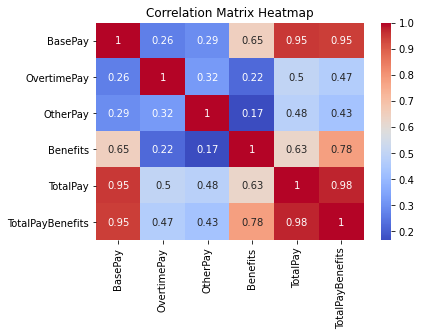

In [66]:
# Select the columns of interest
columns_of_interest = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits']

# Create a correlation matrix of the selected columns
correlation_matrix = df_new[columns_of_interest].corr()

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Set the title of the plot
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

<h3> The range

In [67]:
range1 = df_new.describe().loc[['min', 'max'], columns_of_interest].transpose()
range1['range'] = range1['max'] - range1['min']
range1

,min,max,range
BasePay,6.04,319275.01,319268.97
OvertimePay,-0.01,245131.88,245131.89
OtherPay,-7058.59,400184.25,407242.84
Benefits,0.00,96570.66,96570.66
TotalPay,15.50,567595.43,567579.93
TotalPayBenefits,15.66,567595.43,567579.77


<h2> 4. Calculating the measures of central tendency

In [68]:
df_ct = pd.DataFrame() # ct stands for central tendency


In [69]:
dfff = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits']
df_ct = df_new.loc[:, dfff].mode().transpose().rename(columns = {0: 'mode'})

In [70]:
df_ct['mean'] = df_new.loc[: , columns_of_interest].mean()
df_ct['median'] = df_new.loc[: , columns_of_interest].median()

df_ct

,mode,mean,median
BasePay,54703.0,66917.130321,65258.010
OvertimePay,0.0,5130.611405,0.000
OtherPay,0.0,3638.405132,809.710
Benefits,0.0,19142.601124,23935.185
TotalPay,18594.0,75686.146858,72094.010
TotalPayBenefits,123290.7,94828.747982,93298.930


<h2> 5. Applying the describe method

In [71]:
df_new[columns_of_interest].describe()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits
count,146736.000000,146736.000000,146736.000000,146736.000000,146736.000000,146736.000000
mean,66917.130321,5130.611405,3638.405132,19142.601124,75686.146858,94828.747982
std,42491.578949,11513.508640,7964.167855,17165.560305,50175.006143,62384.972357
min,6.040000,-0.010000,-7058.590000,0.000000,15.500000,15.660000
25%,35411.025000,0.000000,0.000000,0.000000,38782.057500,47047.372500
50%,65258.010000,0.000000,809.710000,23935.185000,72094.010000,93298.930000
75%,94984.072500,4768.055000,4250.000000,33569.352500,106492.070000,133526.355000
max,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000


<h2> 6. Building histograms

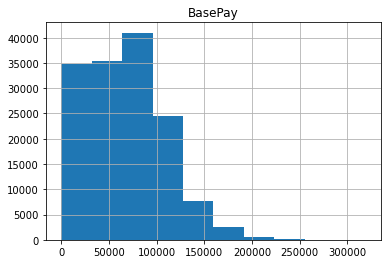

In [72]:
df_new[['BasePay']].hist()
plt.show()

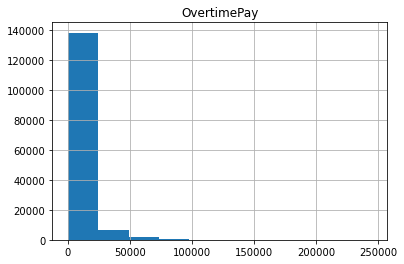

In [73]:
df_new[['OvertimePay']].hist()
plt.show()

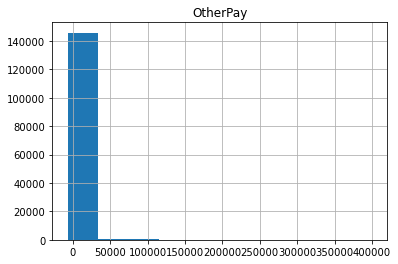

In [74]:
df_new[['OtherPay']].hist()
plt.show()

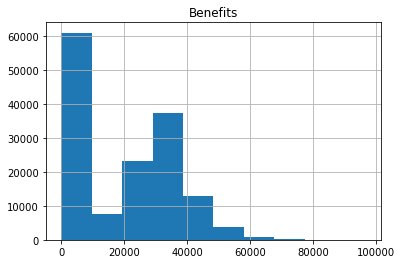

In [75]:
df_new[['Benefits']].hist()
plt.show()

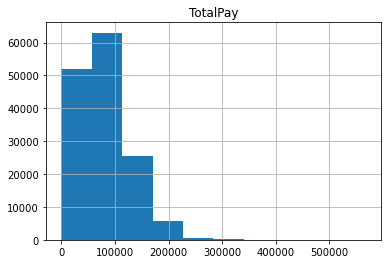

In [76]:
df_new[['TotalPay']].hist()
plt.show()

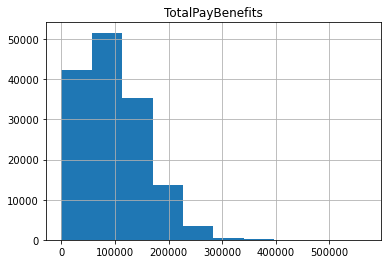

In [77]:
df_new[['TotalPayBenefits']].hist()
plt.show()

<h2> Building boxplots

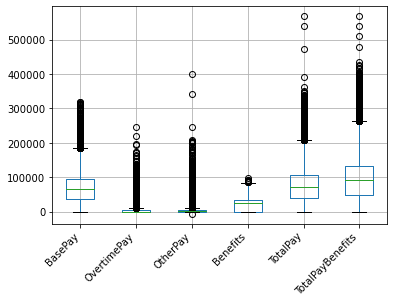

In [78]:
df_new.boxplot(columns_of_interest)
plt.xticks(rotation=45, ha='right')
plt.show()

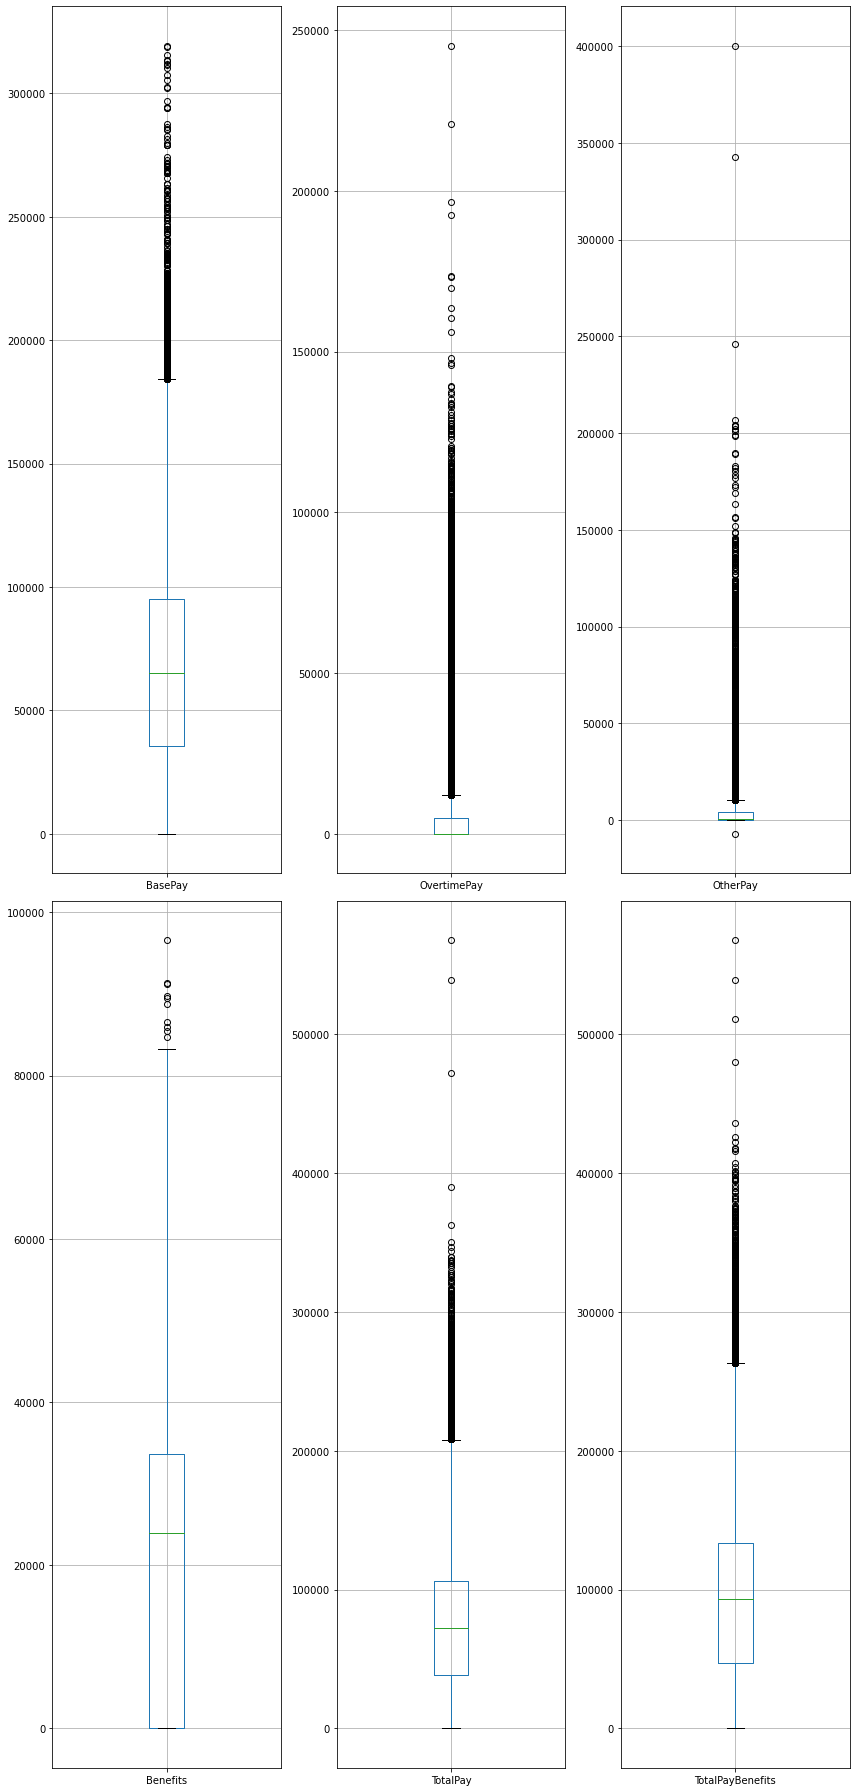

In [79]:
fig, axs = plt.subplots(2, 3, figsize=(12, 25))

# Plot boxplots
columns = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits']
axs = axs.flatten()  # Flatten the subplots array for easier indexing

for i, col in enumerate(columns):
    df_new.boxplot(column=col, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels())

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

<h2> 8. Calculating IQR (Interquirtile range)

In the following code, using describe method on `df_new` dataset iqr or interquirtile range was calculated and stored in another small dataframe `df_iqr` along with 25% and 75% percent ranges.

In [80]:
df_iqr = df_new[columns_of_interest].describe().transpose()[['25%', '75%']]
df_iqr['iqr'] = df_iqr['75%'] - df_iqr['25%']
df_iqr 

,25%,75%,iqr
BasePay,35411.0250,94984.0725,59573.0475
OvertimePay,0.0000,4768.0550,4768.0550
OtherPay,0.0000,4250.0000,4250.0000
Benefits,0.0000,33569.3525,33569.3525
TotalPay,38782.0575,106492.0700,67710.0125
TotalPayBenefits,47047.3725,133526.3550,86478.9825


<h2> 9. Conclusion

It was a great experience! However, there are some outliers present in the data. These outliers can be justified in various ways. Some high salaries might be attributed to individuals holding top positions within the organization. Additionally, certain employees could have received higher pay due to performance-related bonuses or their commitment to working extra hours. These justifiable cases of outliers exist in the dataset.

As part of this project, the decision has been made not to drop all outliers from the dataset, as the author believes that it would not be reasonable. Removing outliers can significantly affect the statistical calculations and might lead to the loss of valuable insights from the data. Instead, the author will keep the outliers in the dataset and consider them as valid data points representing unique situations.

Looking ahead, the author may return to the dataset in the future for further analysis with a fresh perspective and additional knowledge. 